# Индекс новостей

In [1]:
import numpy as np
import pandas as pd
import datetime
import os

import pickle

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

from tqdm import tqdm as tqdm_notebook

from collections import defaultdict

%matplotlib inline

In [37]:
path = r"data_simple_index_v2/"

source_all = [
    "news_krizis_index_month_ria_all.tsv",
    "news_krizis_index_month_interfax_all.tsv",
    "news_krizis_index_month_tass_all.tsv",
    "news_krizis_index_month_rbc.tsv",
    "news_krizis_index_month_lenta_all.tsv"
]

source = [
    "news_krizis_index_month_ria.tsv",
    "news_krizis_index_month_interfax.tsv",
    "news_krizis_index_month_tass.tsv",
    "news_krizis_index_month_rbc.tsv",
    "news_krizis_index_month_lenta.tsv",
]

dfs = [ ]
for s in source:#_all:
    dfs.append(pd.read_csv(path + s, sep='\t'))

In [38]:
weights = dfs[0][['fielddate', 'total_cnt']].set_index('fielddate')
weights.columns = ['total_cnt_ria']

for item, jtem in zip(dfs[1:], ['interfax', 'tass', 'rbc', 'lenta']):
    df_cur = item[['fielddate', 'total_cnt']].set_index('fielddate')
    df_cur.columns = ['total_cnt_' + jtem]
    weights = weights.join(df_cur)
    
weights.fillna(0, inplace=True)
weights['total'] = weights.sum(axis=1)

for c in weights.columns:
    weights[c] = weights[c]/weights['total']
    
weights.head() # веса источников

,total_cnt_ria,total_cnt_interfax,total_cnt_tass,total_cnt_rbc,total_cnt_lenta,total
fielddate,,,,,,
2004-02,1.0,0.0,0.0,0.0,0.0,1.0
2004-03,1.0,0.0,0.0,0.0,0.0,1.0
2004-04,1.0,0.0,0.0,0.0,0.0,1.0
2004-05,1.0,0.0,0.0,0.0,0.0,1.0
2004-06,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
dff = weights.join(dfs[0].set_index('fielddate')).fillna(0)

col = ['newsInd_krizis_share', 'newsInd_krizis_corr', 'newsInd_krizis_neg', 
       'newsInd_krizis_neg_len', 'newsInd_krizis_diff', 'newsInd_krizis_diff_len']

for item in col:
    dff[item] = dff[item]*dff['total_cnt_ria']
    for w,cur_df in zip(weights.columns[1:], dfs[1:]):
        cur_df = weights.join(cur_df.set_index('fielddate')).fillna(0)
        dff[item] = dff[item] + cur_df[item]*cur_df[w]      

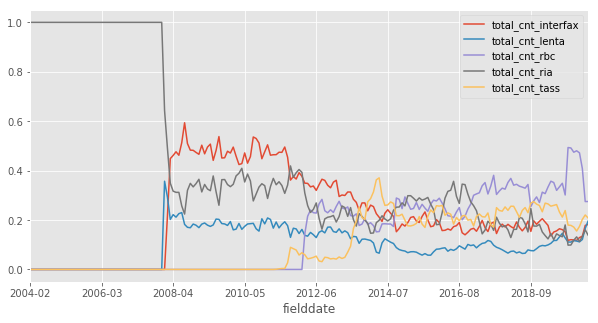

In [40]:
dff[['total_cnt_interfax','total_cnt_lenta','total_cnt_rbc','total_cnt_ria','total_cnt_tass']].plot(figsize=(10,5))

In [41]:
dff.drop(['total_cnt_interfax','total_cnt_lenta','total_cnt_rbc','total_cnt_ria','total_cnt_tass',
          'total', 'total_cnt'], axis=1, inplace=True)

In [42]:
dff.head()

,newsInd_krizis_share,newsInd_krizis_corr,newsInd_krizis_neg,newsInd_krizis_neg_len,newsInd_krizis_diff,newsInd_krizis_diff_len
fielddate,,,,,,
2004-02,24.731849,20.871512,28.751433,31.089287,28.758503,34.770276
2004-03,5.241918,0.612129,3.289725,12.094990,3.083925,15.247898
2004-04,8.277492,34.124945,0.000000,7.667662,0.000000,10.593709
2004-05,9.878104,29.539187,26.968298,30.088417,27.119429,33.798114
2004-06,11.426799,35.723443,11.754380,19.786317,12.209574,25.754343


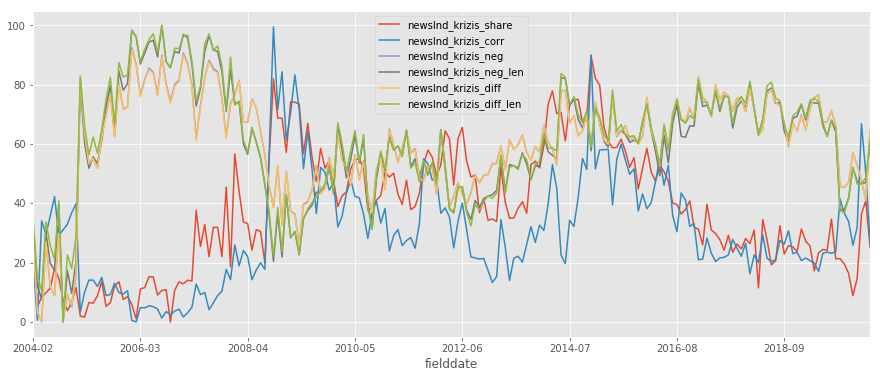

In [43]:
dff.plot(figsize=(15,6));

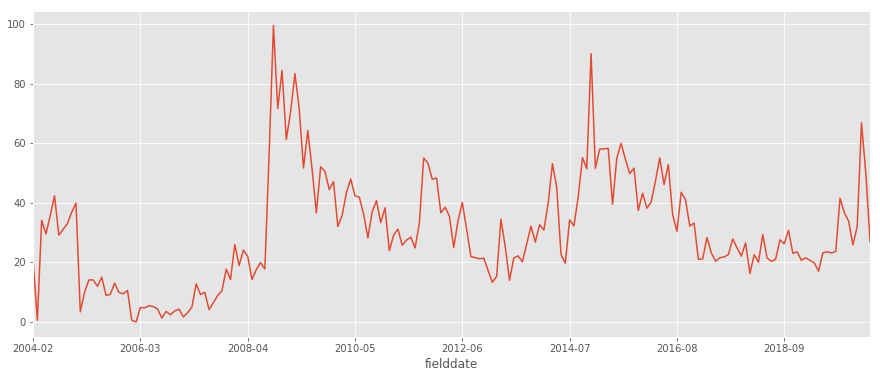

In [44]:
dff['newsInd_krizis_corr'].plot(figsize=(15,6));

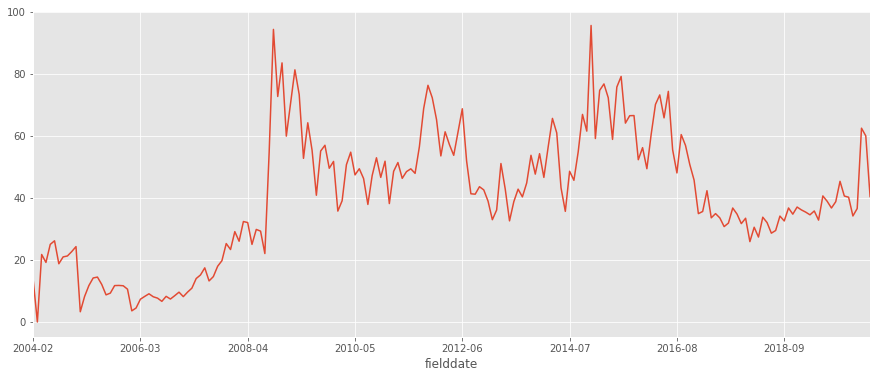

In [35]:
dff['newsInd_krizis_corr'].plot(figsize=(15,6));

In [36]:
dff.to_csv(path + "news_krizis_index_month_all.tsv", sep='\t')